<a href="https://colab.research.google.com/github/KonradKomor/GoogleCollabRepository/blob/main/TwitchChatAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import plotly.express as px
import spacy
import math
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('healthygamer_gg_testdata.csv')
df.head()

,user,channel,message,timestamp
0,itztony1702,healthygamer_gg,BibleThump BibleThump,2021-07-16 14:05:22
1,flaredrip,healthygamer_gg,SUPERHERO BibleThump BibleThump,2021-07-16 14:05:23
2,modxta23,healthygamer_gg,GOOD DAD FeelsGoodMan,2021-07-16 14:05:23
3,reaperdiff,healthygamer_gg,FeelsStrongMan,2021-07-16 14:05:23
4,3rdkira,healthygamer_gg,drhgWeird,2021-07-16 14:05:25


In [ ]:
comment=df.message
comment=comment.replace(np.nan, '')

In [ ]:
nlp=spacy.load('en')

In [ ]:
comment=comment.values.tolist()

In [ ]:
for element in comment:
  str(element)


In [ ]:
#Use Spacy Tokenizer to tokenize all of the sentences
listOfWords=[]
for i in range(len(comment)):
  #print(type(comment[i]))
  doc=nlp(comment[i])
  words=[word.text for word in doc]
  listOfWords=listOfWords+words

In [ ]:
dfOfWords=pd.DataFrame(listOfWords)

In [ ]:
dfOfWords.head()

,0
0,BibleThump
1,BibleThump
2,SUPERHERO
3,BibleThump
4,BibleThump


In [ ]:
dfOfWords.set_index(0)

""
0
BibleThump
BibleThump
SUPERHERO
BibleThump
BibleThump
...
/
didn't
check


In [ ]:
dfOfWords.rename(columns={0 : 'word'})


,word
0,BibleThump
1,BibleThump
2,SUPERHERO
3,BibleThump
4,BibleThump
...,...
26698,/
26699,didn't
26700,check
26701,tmi.twitch.tv


In [ ]:
data=dfOfWords.value_counts()


In [ ]:
data


<3              852
?               533
Sadge           423
KEKW            365
the             361
               ... 
creepyweeper      1
create            1
signs             1
crash             1
destroyed         1
Length: 4814, dtype: int64

In [ ]:
data=pd.DataFrame(data)
data=data.rename(columns={0 : 'count'})
data


,count
0,
<3,852
?,533
Sadge,423
KEKW,365
the,361
...,...
creepyweeper,1
create,1
signs,1


In [ ]:
data=data.reset_index()

In [ ]:
data=data.rename(columns={0 : 'word'})


In [ ]:
data

,word,count
0,<3,852
1,?,533
2,Sadge,423
3,KEKW,365
4,the,361
...,...,...
4809,creepyweeper,1
4810,create,1
4811,signs,1
4812,crash,1


In [ ]:
datacloud=data[:20]

In [ ]:
datacloud

,word,count
0,<3,852
1,?,533
2,Sadge,423
3,KEKW,365
4,the,361
5,I,356
6,",",310
7,EZ,304
8,a,292
9,is,288


In [51]:
fig= px.bar(data_frame=datacloud, x='word',y='count')
fig.show()

In [85]:
y=len(chainOfWords)
print(y)

0


In [83]:
chainOfWords=''
for i in range(len(chainOfWords)):
  x=str(wordCloudList[i])
  chainOfWords=chainOfWords+' '+x+' '
wordcloud=WordCloud().generate(chainOfWords)

ValueError: ignored

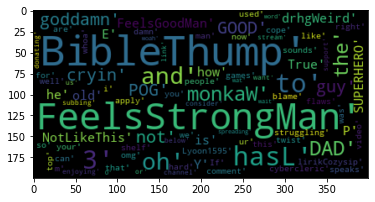

In [82]:
plt.imshow(wordcloud, interpolation='bilinear')

In [68]:
wordCloudList[19]

['True']